# 支持向量机（SVM)

支持向量机是一种监督学习方法，可用于分类、回归和异常值检查（）。

## 支持向量机的优点是：

- 在高维空间有效。
- 在尺寸数量大于样本数量的情况下仍然有效。
- 在决策函数中使用训练点的子集（称为支持向量），因此它也具有内存效率。
- 多功能：可以为决策功能指定不同的内核功能。提供了通用内核，但也可以指定自定义内核。

## 支持向量机的缺点包括：

- 如果要素的数量远远大于样本数量，请避免在选择内核函数时过度拟合，并且正则化项是至关重要的。
- SVM不直接提供概率估计，这些是使用昂贵的五重交叉验证计算的（参见下面的分数和概率）。

## 间隔与支持向量

给定训练样本集$D = {(x_1,y_1),(x_2,y_2),...(x_m,y_m)}， 其中 y_i \in \{-1,+1\}$，分类学习最基本的想法就是基于训练集D在样本空间中找到一个划分超平面，将不同类别的样本分开。但能将训练样本分开的超平面可能由很多，如下图所示：

![存在多个划分超平面将两类训练样本分开](images/svm/存在多个划分超平面将两类训练样本分开.png)

我们应该努力去找哪个呢？

直观上看，应该去找位于两类训练样本“正中间”的 划分超平面，即中间那条“粗线”，因为该划分超平面对训练样本局部扰动的容忍性最好。换言之，这个划分超平面所产生的分类结果是最鲁棒的，对未见示例的泛化性能最强。

在样本空间中，划分超平面可通过如下线性方程来描述：

$w^Tx + b =0$  ——（式1）

其中$w = (w_1;w_2;...;w_d)$为法向量，决定了超平面的方向；b为位移项，决定了超平面与原点之间的距离。显然，划分超平面可被法向量w和位移b确定，下面我们将其标记为$(w,b)$。样本空间中任意点x到超平面$(w,b)$的距离可写为：

$r = \frac{|w^Tx + b|}{||w||}$  ——式（2）

注释：

上式即用向量法求平面外一点到平面距离（距离 = 向量P点乘法向量再除以法向量的模。）

分子部分是向量$w^Tx + b$的数量积：$|w^Tx + b| = |w_1x_1+w_2x_2+...+w_dx_d + b| $  

分母部分是法向量$w$的模： $||w|| = \sqrt{w_1^2+w_2^2+...+w_d^2}$

假设超平面$(w,b)$能将训练样本正确分类，即对于$(x_i,y_i) \in D$，若$y_i = +1$，则由$w^Tx_i + b > 0 $；若$y_i = -1$，则由$w^Tx_i + b < 0 $。令：

$$\left\{
\begin{aligned}
w^Tx_i + b \geq +1, y_i = +1;  \\
w^Tx_i + b \leq -1, y_i = -1。\\
\end{aligned}
\right.  ——式（3）
$$


如下图所示，**距离超平面最近的这几个训练样本点使式（3）的等号成立，它们被称为“支持向量"(support vector)**.

![支持向量与间隔](images/svm/支持向量与间隔.png)

两个异类支持向量到超平面的距离之和被称为**间隔（margin）**，计算式为：

$\gamma = \frac{2}{||w||}$  ——式（4）



想要找到具有“最大间隔”（maximun margin）的划分超平面，也就是要找到能满足式（3）中约束的参数$w$和$b$，使得$\gamma$最大，即：

$max_{w,b} \frac{2}{||w||}$  ——式（5）

s.t.(约束条件)： $ y_i(w^Tx_i + b) \geq 1, i = 1,2,...,m.$

显然，为了最大化间隔，仅需最大化$||w||^{-1}$，这等价于最小化$||w||^2$。于是，式（5）可重写为：

$min_{w,b} \frac{||w||^2}{2}$  ——式（6）

s.t. $ y_i(w^Tx_i + b) \geq 1, i = 1,2,...,m.$

**这就是支持向量机（Support Vector Machine，简称SVM）的基本型。**

## 对偶问题

我们希望求解式（6）来得到大间隔划分超平面所对应的模型：

$f(x) = w^Tx + b$ ——式（7）

其中w和b是模型参数。

注意到，式（6）本身是一个凸二次规划（convex quadratic programming)问题，能直接用现成的优化计算包求解，但我们还有更高效的办法。

>注：凸函数是指对区间 $[a,b]$ 上定义的函数 f，若它对区间中任意两点 $x_1,x_2$均有：$f(\frac{x_1+x_2}{2}) \leq \frac{f(x_1)+f(x_2)}{2}$,则函数f(x)被称为凸函数。例如$ y = x^2就是凸函数$。若不等式始终为“>”,则为严格凸函数。线性函数是凸函数，但不是严格凸函数。 

>假设f、g、h在定义域内是连续可微的，且目标函数f和不等式约束函数g是凸函数，等式约束h是仿射函数（线性函数），则这种约束最优化问题称为凸优化问题。   

>凸二次规划问题是凸优化问题的一个特殊形式，当目标函数是二次型函数且约束函数 g 是线性函数时，就变成一个凸二次规划问题。


对式（6）使用拉格朗日乘子法可得到其“对偶问题”（dual problem）。具体来说，对式（6）的每条约束添加拉格朗日乘子$a_i \geq 0$，则该问题的拉格朗日函数可写为：

$L(w,b,\alpha) = \frac{1}{2}||w||^2 + \sum_{i=1}^{m}a_i(1 - y_i(w^Tx_i +b))$   —— 式（8）

其中：$\alpha = (\alpha_1; \alpha_2;...；\alpha_m)$，令$L(w,b,\alpha$ 对$w$和b的偏导为零可得：

$w = \sum_{i=1}^{m}\alpha_i y_i x_i$ ——式（9）

$ 0 = \sum_{i=1}^m \alpha_i y_i$  ——式（10）

将式（9）代入（8），即可得到$L(w,b,\alpha)$ 中的w和b小区，在考虑式（10）的约束，就得到式（6）的对偶问题：

$max_\alpha \sum_{i=1}^{m} \alpha_i - \frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m}\alpha_i \alpha_j y_i y_j x_i^T x_j$  ——式（11）

s.t. $ \sum_{i=1}^{m}a_i y_i = 0, a_i \geq 0, i = 1,2,...，m.$

解出$\alpha$后，求出w和b即可得到模型：

$f(x) = w^T x+b = \sum_{i=1}^m \alpha_i y_i x_i^T x +b$ ——式（12）

从对偶问题（11)解出的$\alpha_i$是式（8）中的拉个朗日乘子，它恰对应着训练样本$(x_i,y_i)$。

注意到式（6）中由不等式约束，因此上述过程需满足KTT（Karush-Kuhn-Tucker）条件，即要求：

$$\left\{
\begin{aligned}
\alpha_i \geq 0;  \\
y_i f(x_i) -1 \geq 0;\\
\alpha_i (y_if(x_i)-1) = 0;\\
\end{aligned}
\right.  ——式（13）
$$

于是，对任意训练样本$(x_i,y_i)$, 总由$\alpha_i = 0$或$y_if(x_i) = 1$。

若$\alpha_i = 0$，则这样本将不会在式（12）的求和中出现，也就不会对f(x)有任何影响；

若$\alpha_i > 0$，则这样本将不会在式（12）的求和中出现，也就不会对f(x)有任何影响；

## 实例：使用svm识别手写数字


In [2]:
'''
Created on Nov 4, 2010
Chapter 5 source file for Machine Learing in Action
@author: Peter
'''
from numpy import *
from time import sleep

def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat,labelMat

def selectJrand(i,m):
    j=i #we want to select any J not equal to i
    while (j==i):
        j = int(random.uniform(0,m))
    return j

def clipAlpha(aj,H,L):
    if aj > H: 
        aj = H
    if L > aj:
        aj = L
    return aj

def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    dataMatrix = mat(dataMatIn); labelMat = mat(classLabels).transpose()
    b = 0; m,n = shape(dataMatrix)
    alphas = mat(zeros((m,1)))
    iter = 0
    while (iter < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            fXi = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b
            Ei = fXi - float(labelMat[i])#if checks if an example violates KKT conditions
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                j = selectJrand(i,m)
                fXj = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                Ej = fXj - float(labelMat[j])
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy();
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: print "L==H"; continue
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0: print "eta>=0"; continue
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                alphas[j] = clipAlpha(alphas[j],H,L)
                if (abs(alphas[j] - alphaJold) < 0.00001): print "j not moving enough"; continue
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])#update i by the same amount as j
                                                                        #the update is in the oppostie direction
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                alphaPairsChanged += 1
                print "iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged)
        if (alphaPairsChanged == 0): iter += 1
        else: iter = 0
        print "iteration number: %d" % iter
    return b,alphas

def kernelTrans(X, A, kTup): #calc the kernel or transform data to a higher dimensional space
    m,n = shape(X)
    K = mat(zeros((m,1)))
    if kTup[0]=='lin': K = X * A.T   #linear kernel
    elif kTup[0]=='rbf':
        for j in range(m):
            deltaRow = X[j,:] - A
            K[j] = deltaRow*deltaRow.T
        K = exp(K/(-1*kTup[1]**2)) #divide in NumPy is element-wise not matrix like Matlab
    else: raise NameError('Houston We Have a Problem -- \
    That Kernel is not recognized')
    return K

class optStruct:
    def __init__(self,dataMatIn, classLabels, C, toler, kTup):  # Initialize the structure with the parameters 
        self.X = dataMatIn
        self.labelMat = classLabels
        self.C = C
        self.tol = toler
        self.m = shape(dataMatIn)[0]
        self.alphas = mat(zeros((self.m,1)))
        self.b = 0
        self.eCache = mat(zeros((self.m,2))) #first column is valid flag
        self.K = mat(zeros((self.m,self.m)))
        for i in range(self.m):
            self.K[:,i] = kernelTrans(self.X, self.X[i,:], kTup)
        
def calcEk(oS, k):
    fXk = float(multiply(oS.alphas,oS.labelMat).T*oS.K[:,k] + oS.b)
    Ek = fXk - float(oS.labelMat[k])
    return Ek
        
def selectJ(i, oS, Ei):         #this is the second choice -heurstic, and calcs Ej
    maxK = -1; maxDeltaE = 0; Ej = 0
    oS.eCache[i] = [1,Ei]  #set valid #choose the alpha that gives the maximum delta E
    validEcacheList = nonzero(oS.eCache[:,0].A)[0]
    if (len(validEcacheList)) > 1:
        for k in validEcacheList:   #loop through valid Ecache values and find the one that maximizes delta E
            if k == i: continue #don't calc for i, waste of time
            Ek = calcEk(oS, k)
            deltaE = abs(Ei - Ek)
            if (deltaE > maxDeltaE):
                maxK = k; maxDeltaE = deltaE; Ej = Ek
        return maxK, Ej
    else:   #in this case (first time around) we don't have any valid eCache values
        j = selectJrand(i, oS.m)
        Ej = calcEk(oS, j)
    return j, Ej

def updateEk(oS, k):#after any alpha has changed update the new value in the cache
    Ek = calcEk(oS, k)
    oS.eCache[k] = [1,Ek]
        
def innerL(i, oS):
    Ei = calcEk(oS, i)
    if ((oS.labelMat[i]*Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or ((oS.labelMat[i]*Ei > oS.tol) and (oS.alphas[i] > 0)):
        j,Ej = selectJ(i, oS, Ei) #this has been changed from selectJrand
        alphaIold = oS.alphas[i].copy(); alphaJold = oS.alphas[j].copy();
        if (oS.labelMat[i] != oS.labelMat[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L==H: print "L==H"; return 0
        eta = 2.0 * oS.K[i,j] - oS.K[i,i] - oS.K[j,j] #changed for kernel
        if eta >= 0: print "eta>=0"; return 0
        oS.alphas[j] -= oS.labelMat[j]*(Ei - Ej)/eta
        oS.alphas[j] = clipAlpha(oS.alphas[j],H,L)
        updateEk(oS, j) #added this for the Ecache
        if (abs(oS.alphas[j] - alphaJold) < 0.00001): print "j not moving enough"; return 0
        oS.alphas[i] += oS.labelMat[j]*oS.labelMat[i]*(alphaJold - oS.alphas[j])#update i by the same amount as j
        updateEk(oS, i) #added this for the Ecache                    #the update is in the oppostie direction
        b1 = oS.b - Ei- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,i] - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[i,j]
        b2 = oS.b - Ej- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,j]- oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[j,j]
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]): oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]): oS.b = b2
        else: oS.b = (b1 + b2)/2.0
        return 1
    else: return 0

def smoP(dataMatIn, classLabels, C, toler, maxIter,kTup=('lin', 0)):    #full Platt SMO
    oS = optStruct(mat(dataMatIn),mat(classLabels).transpose(),C,toler, kTup)
    iter = 0
    entireSet = True; alphaPairsChanged = 0
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)):
        alphaPairsChanged = 0
        if entireSet:   #go over all
            for i in range(oS.m):        
                alphaPairsChanged += innerL(i,oS)
                print "fullSet, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged)
            iter += 1
        else:#go over non-bound (railed) alphas
            nonBoundIs = nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]
            for i in nonBoundIs:
                alphaPairsChanged += innerL(i,oS)
                print "non-bound, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged)
            iter += 1
        if entireSet: entireSet = False #toggle entire set loop
        elif (alphaPairsChanged == 0): entireSet = True  
        print "iteration number: %d" % iter
    return oS.b,oS.alphas

def calcWs(alphas,dataArr,classLabels):
    X = mat(dataArr); labelMat = mat(classLabels).transpose()
    m,n = shape(X)
    w = zeros((n,1))
    for i in range(m):
        w += multiply(alphas[i]*labelMat[i],X[i,:].T)
    return w

def testRbf(k1=1.3):
    dataArr,labelArr = loadDataSet('testSetRBF.txt')
    b,alphas = smoP(dataArr, labelArr, 200, 0.0001, 10000, ('rbf', k1)) #C=200 important
    datMat=mat(dataArr); labelMat = mat(labelArr).transpose()
    svInd=nonzero(alphas.A>0)[0]
    sVs=datMat[svInd] #get matrix of only support vectors
    labelSV = labelMat[svInd];
    print "there are %d Support Vectors" % shape(sVs)[0]
    m,n = shape(datMat)
    errorCount = 0
    for i in range(m):
        kernelEval = kernelTrans(sVs,datMat[i,:],('rbf', k1))
        predict=kernelEval.T * multiply(labelSV,alphas[svInd]) + b
        if sign(predict)!=sign(labelArr[i]): errorCount += 1
    print "the training error rate is: %f" % (float(errorCount)/m)
    dataArr,labelArr = loadDataSet('testSetRBF2.txt')
    errorCount = 0
    datMat=mat(dataArr); labelMat = mat(labelArr).transpose()
    m,n = shape(datMat)
    for i in range(m):
        kernelEval = kernelTrans(sVs,datMat[i,:],('rbf', k1))
        predict=kernelEval.T * multiply(labelSV,alphas[svInd]) + b
        if sign(predict)!=sign(labelArr[i]): errorCount += 1    
    print "the test error rate is: %f" % (float(errorCount)/m)    
    
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

def loadImages(dirName):
    from os import listdir
    hwLabels = []
    trainingFileList = listdir(dirName)           #load the training set
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        if classNumStr == 9: hwLabels.append(-1)
        else: hwLabels.append(1)
        trainingMat[i,:] = img2vector('%s/%s' % (dirName, fileNameStr))
    return trainingMat, hwLabels    

def testDigits(kTup=('rbf', 10)):
    dataArr,labelArr = loadImages('trainingDigits')
    b,alphas = smoP(dataArr, labelArr, 200, 0.0001, 10000, kTup)
    datMat=mat(dataArr); labelMat = mat(labelArr).transpose()
    svInd=nonzero(alphas.A>0)[0]
    sVs=datMat[svInd] 
    labelSV = labelMat[svInd];
    print "there are %d Support Vectors" % shape(sVs)[0]
    m,n = shape(datMat)
    errorCount = 0
    for i in range(m):
        kernelEval = kernelTrans(sVs,datMat[i,:],kTup)
        predict=kernelEval.T * multiply(labelSV,alphas[svInd]) + b
        if sign(predict)!=sign(labelArr[i]): errorCount += 1
    print "the training error rate is: %f" % (float(errorCount)/m)
    dataArr,labelArr = loadImages('testDigits')
    errorCount = 0
    datMat=mat(dataArr); labelMat = mat(labelArr).transpose()
    m,n = shape(datMat)
    for i in range(m):
        kernelEval = kernelTrans(sVs,datMat[i,:],kTup)
        predict=kernelEval.T * multiply(labelSV,alphas[svInd]) + b
        if sign(predict)!=sign(labelArr[i]): errorCount += 1    
    print "the test error rate is: %f" % (float(errorCount)/m) 


'''#######********************************
Non-Kernel VErsions below
'''#######********************************

class optStructK:
    def __init__(self,dataMatIn, classLabels, C, toler):  # Initialize the structure with the parameters 
        self.X = dataMatIn
        self.labelMat = classLabels
        self.C = C
        self.tol = toler
        self.m = shape(dataMatIn)[0]
        self.alphas = mat(zeros((self.m,1)))
        self.b = 0
        self.eCache = mat(zeros((self.m,2))) #first column is valid flag
        
def calcEkK(oS, k):
    fXk = float(multiply(oS.alphas,oS.labelMat).T*(oS.X*oS.X[k,:].T)) + oS.b
    Ek = fXk - float(oS.labelMat[k])
    return Ek
        
def selectJK(i, oS, Ei):         #this is the second choice -heurstic, and calcs Ej
    maxK = -1; maxDeltaE = 0; Ej = 0
    oS.eCache[i] = [1,Ei]  #set valid #choose the alpha that gives the maximum delta E
    validEcacheList = nonzero(oS.eCache[:,0].A)[0]
    if (len(validEcacheList)) > 1:
        for k in validEcacheList:   #loop through valid Ecache values and find the one that maximizes delta E
            if k == i: continue #don't calc for i, waste of time
            Ek = calcEk(oS, k)
            deltaE = abs(Ei - Ek)
            if (deltaE > maxDeltaE):
                maxK = k; maxDeltaE = deltaE; Ej = Ek
        return maxK, Ej
    else:   #in this case (first time around) we don't have any valid eCache values
        j = selectJrand(i, oS.m)
        Ej = calcEk(oS, j)
    return j, Ej

def updateEkK(oS, k):#after any alpha has changed update the new value in the cache
    Ek = calcEk(oS, k)
    oS.eCache[k] = [1,Ek]
        
def innerLK(i, oS):
    Ei = calcEk(oS, i)
    if ((oS.labelMat[i]*Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or ((oS.labelMat[i]*Ei > oS.tol) and (oS.alphas[i] > 0)):
        j,Ej = selectJ(i, oS, Ei) #this has been changed from selectJrand
        alphaIold = oS.alphas[i].copy(); alphaJold = oS.alphas[j].copy();
        if (oS.labelMat[i] != oS.labelMat[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L==H: print "L==H"; return 0
        eta = 2.0 * oS.X[i,:]*oS.X[j,:].T - oS.X[i,:]*oS.X[i,:].T - oS.X[j,:]*oS.X[j,:].T
        if eta >= 0: print "eta>=0"; return 0
        oS.alphas[j] -= oS.labelMat[j]*(Ei - Ej)/eta
        oS.alphas[j] = clipAlpha(oS.alphas[j],H,L)
        updateEk(oS, j) #added this for the Ecache
        if (abs(oS.alphas[j] - alphaJold) < 0.00001): print "j not moving enough"; return 0
        oS.alphas[i] += oS.labelMat[j]*oS.labelMat[i]*(alphaJold - oS.alphas[j])#update i by the same amount as j
        updateEk(oS, i) #added this for the Ecache                    #the update is in the oppostie direction
        b1 = oS.b - Ei- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.X[i,:]*oS.X[i,:].T - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.X[i,:]*oS.X[j,:].T
        b2 = oS.b - Ej- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.X[i,:]*oS.X[j,:].T - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.X[j,:]*oS.X[j,:].T
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]): oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]): oS.b = b2
        else: oS.b = (b1 + b2)/2.0
        return 1
    else: return 0

def smoPK(dataMatIn, classLabels, C, toler, maxIter):    #full Platt SMO
    oS = optStruct(mat(dataMatIn),mat(classLabels).transpose(),C,toler)
    iter = 0
    entireSet = True; alphaPairsChanged = 0
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)):
        alphaPairsChanged = 0
        if entireSet:   #go over all
            for i in range(oS.m):        
                alphaPairsChanged += innerL(i,oS)
                print "fullSet, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged)
            iter += 1
        else:#go over non-bound (railed) alphas
            nonBoundIs = nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]
            for i in nonBoundIs:
                alphaPairsChanged += innerL(i,oS)
                print "non-bound, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged)
            iter += 1
        if entireSet: entireSet = False #toggle entire set loop
        elif (alphaPairsChanged == 0): entireSet = True  
        print( "iteration number: %d" % iter)
    return oS.b,oS.alphas

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("L==H")? (<ipython-input-2-14cbd0ccef1b>, line 52)

## 使用sklearn中的svm模型进行预测

scikit-learn中的支持向量机支持密集（numpy.ndarray可转换为by by numpy.asarray）和稀疏（任意scipy.sparse）样本向量作为输入。但是，要使用SVM对稀疏数据进行预测，它必须适合此类数据。为获得最佳性能，请使用C-ordered numpy.ndarray（密集）或 scipy.sparse.csr_matrix（稀疏）dtype=float64。

先看一个简单示例：

In [12]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC

df = pd.DataFrame({'x1':[-1,-2,1,2],'x2':[-1,-1,1,1],'y':[-1,-2,1,2]})


clf = SVC(gamma='auto')
clf.fit(df.iloc[:,:-1],df.iloc[:,-1] ) 
print("训练数据集：")
print(df)

print("待预测数据x1和x2为：{}".format([-0.8, -1]))
print("预测结果y：{}".format(clf.predict([[-0.8, -1]])))

训练数据集：
   x1  x2  y
0  -1  -1 -1
1  -2  -1 -2
2   1   1  1
3   2   1  2
待预测数据x1和x2为：[-0.8, -1]
预测结果y：[-1]


In [ ]:
### 分类任务

sklearn中的SVC，NuSVC并且LinearSVC等类型的SVM算法，能够完成对数据集的多分类任务。

Automatically created module for IPython interactive environment


D:\pythonspace\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\pythonspace\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


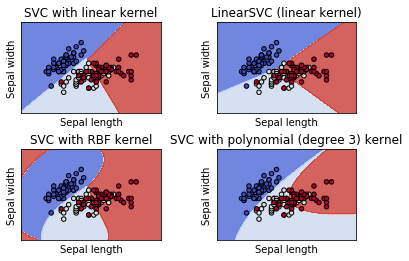

In [16]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### 回归任务



Automatically created module for IPython interactive environment


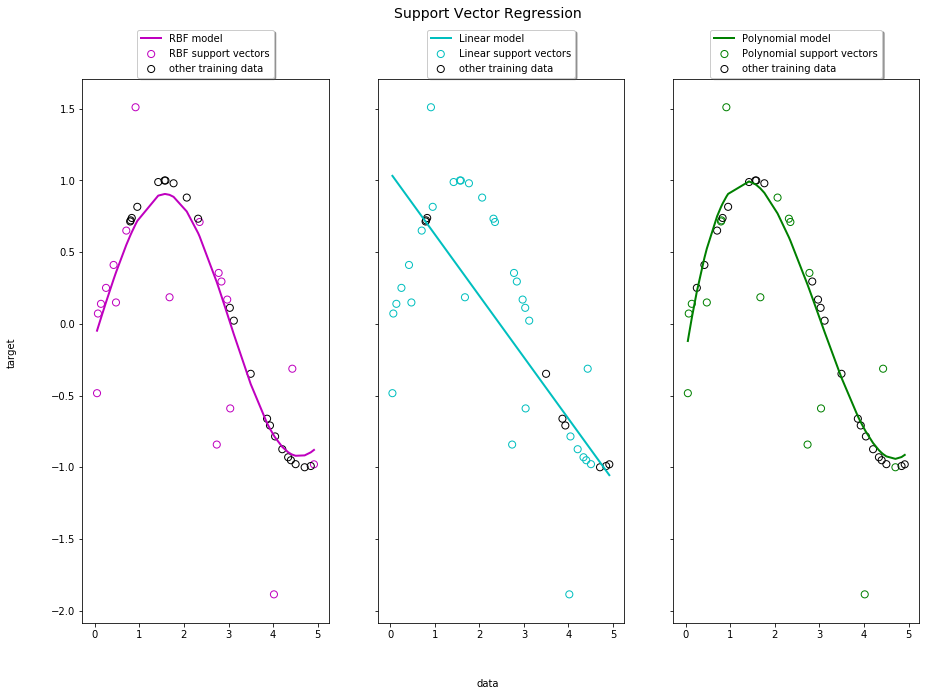

In [15]:
print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()